# 1. The Convolution Operation in Image Processing

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.0 (27/12/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Matplotlib (tested on v3.5.1)
- Numpy (tested on v1.22.1)
- Pillow (tested on v9.3.0)

### Imports

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
# Numpy
import numpy as np
from numpy.random import default_rng
# Pillow
from PIL import Image
# Scipy
from scipy.signal import correlate

### Loading an image for testing

...

In [2]:
# Open the image and convert it to grayscale
im = Image.open('flower.jpg').convert('L')

# Convert the image to a NumPy array
im_array = np.array(im)

# Print the shape of the array
print(im_array.shape)

(459, 612)


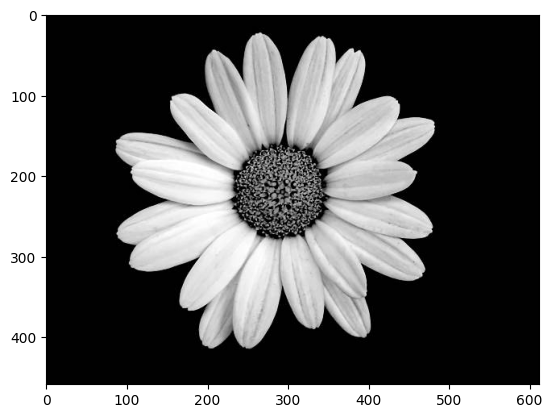

In [3]:
# Display image in matplotlib
plt.imshow(im_array, cmap = 'gray')
plt.show()

### The convolution operation, explained

Convolution is a mathematical operation that is used to compute the output of a linear filter from an input image. It is a fundamental operation in image processing and computer vision, and is used to apply various kinds of image filters, such as blur, sharpen, edge detection, and so on.

In [4]:
# Our convolution function
def convolution(image, kernel):
    # Flip the kernel (optional)
    kernel = np.flipud(np.fliplr(kernel))
    
    # Get the dimensions of the image and kernel
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape
    
    # Set the output image to the correct size
    output = np.zeros_like(image)
    
    # Convolve using Numpy
    output = correlate(image, kernel, mode = 'valid')
    
    # Note that this is equivalent to this
    '''
    # Loop through the image, applying the convolution
    for x in range(image_rows - kernel_rows + 1):
        for y in range(image_cols - kernel_cols + 1):
            output[x, y] = (kernel * image[x:x+kernel_rows, y:y+kernel_cols]).sum()
    '''
    return output

In [5]:
# Blur
kernel = np.array([[1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1]])/25
image_conv = convolution(im_array, kernel)
print(image_conv.shape)

(455, 608)


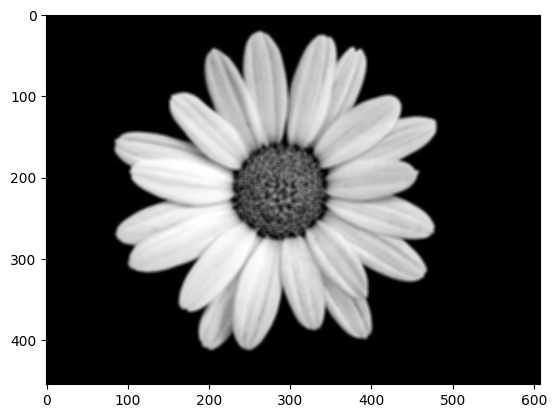

In [6]:
# Display image in matplotlib
plt.imshow(image_conv, cmap = 'gray')
plt.show()

In [7]:
# Blur
kernel = np.array([[1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1]])/25
image_conv_more = convolution(image_conv, kernel)
print(image_conv_more.shape)

(451, 604)


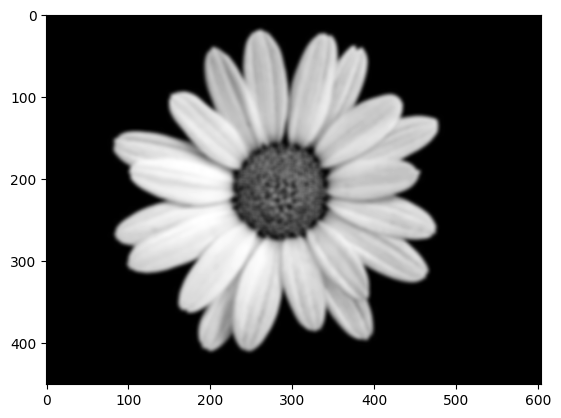

In [8]:
# Display image in matplotlib
plt.imshow(image_conv_more, cmap = 'gray')
plt.show()

In [9]:
# Blur
kernel = np.array([[1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1]])/25
image_conv_even_more = convolution(image_conv_more, kernel)
print(image_conv_even_more.shape)

(447, 600)


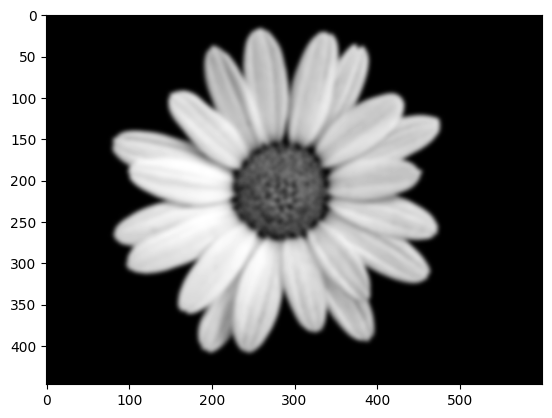

In [10]:
# Display image in matplotlib
plt.imshow(image_conv_even_more, cmap = 'gray')
plt.show()

### Using the convolution operation for edge detection

...

In [11]:
# Trying one kernel (Prewitt kernel for horizontal edges)
kernel1 = np.array([[1, 1, 1],[0, 0, 0],[-1, -1, -1]])
image_conv1 = convolution(im_array, kernel1)
print(image_conv1.shape)

(457, 610)


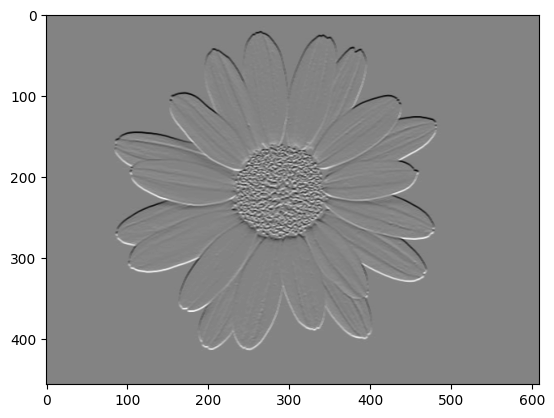

In [12]:
# Display image in matplotlib
plt.imshow(image_conv1, cmap = 'gray')
plt.show()

In [13]:
# Trying one kernel (Prewitt kernel for vertical edges)
kernel2 = np.array([[-1, 0, 1], [-1, 0, 1],[-1, 0, 1]])
image_conv2 = convolution(im_array, kernel2)
print(image_conv2.shape)

(457, 610)


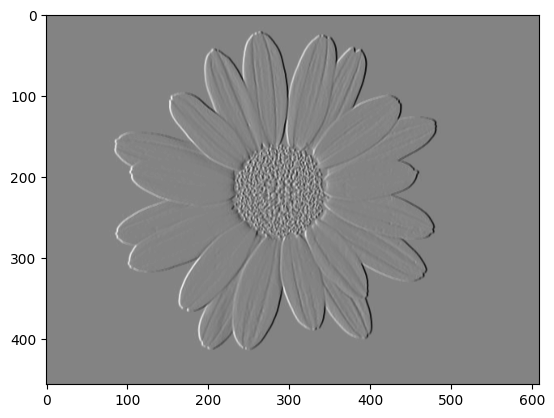

In [14]:
# Display image in matplotlib
plt.imshow(image_conv2, cmap = 'gray')
plt.show()

In [15]:
# Trying one kernel (Prewitt kernel for vertical edges)
kernel3 = np.array([[ 1,  0, -1], [ 0,  0,  0], [-1,  0,  1]])
image_conv3 = convolution(im_array, kernel3)
print(image_conv3.shape)

(457, 610)


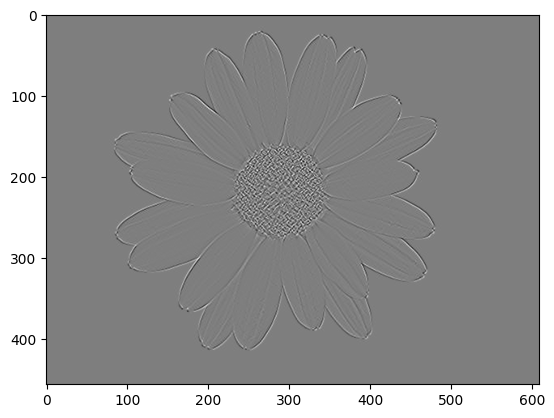

In [16]:
# Display image in matplotlib
plt.imshow(image_conv3, cmap = 'gray')
plt.show()

In [17]:
# Blur
kernel4 = np.array([[1, 1, 1], [1, 1, 1],[1, 1, 1]])/9
image_conv4 = convolution(im_array, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
print(image_conv4.shape)

(437, 590)


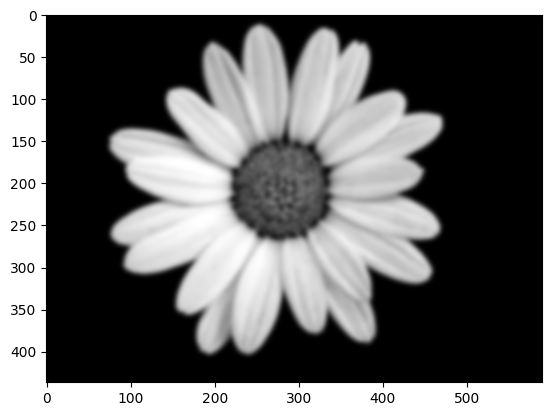

In [18]:
# Display image in matplotlib
plt.imshow(image_conv4, cmap = 'gray')
plt.show()

In [19]:
# Sharpen (= improve contrast)
kernel5 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_conv5 = convolution(im_array, kernel5)
print(image_conv5.shape)

(457, 610)


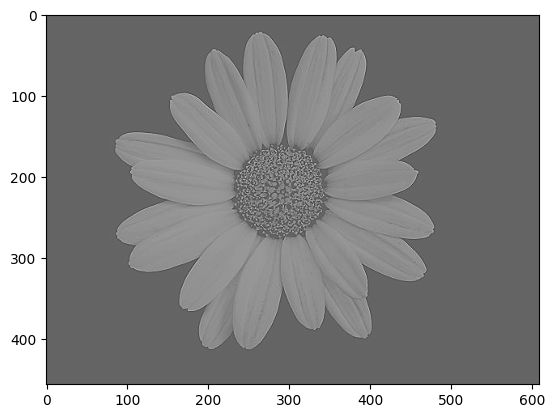

In [20]:
# Display image in matplotlib
plt.imshow(image_conv5, cmap = 'gray')
plt.show()

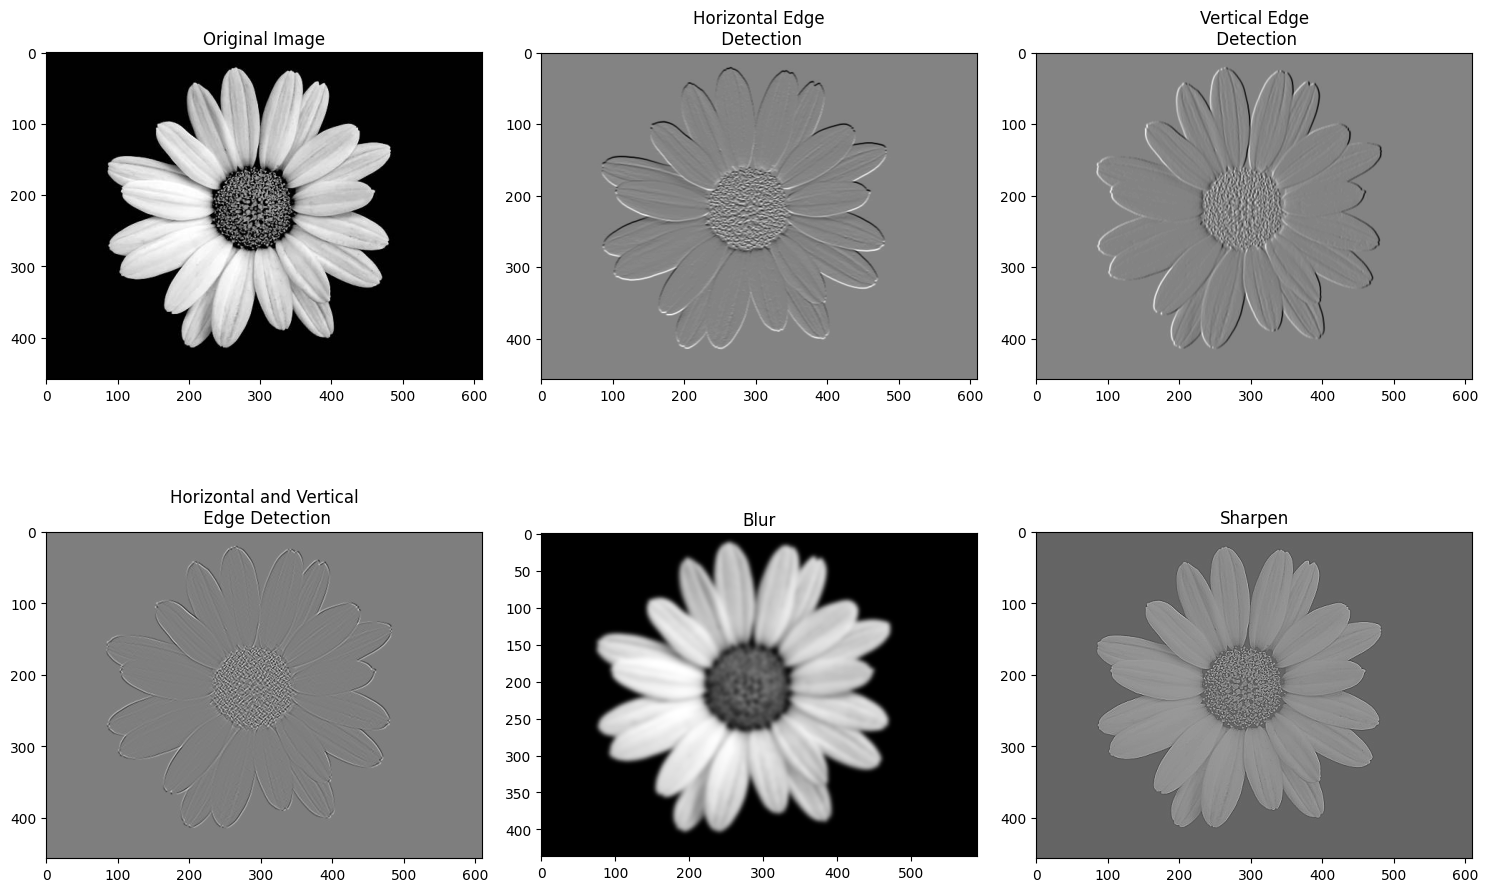

In [21]:
# Display all
fig, axes = plt.subplots(2, 3, figsize = (15, 10))

# Display the images
axes[0, 0].imshow(im_array, cmap = 'gray')
axes[0, 0].set_title('Original Image')
axes[0, 1].imshow(image_conv1, cmap = 'gray')
axes[0, 1].set_title('Horizontal Edge\n Detection')
axes[0, 2].imshow(image_conv2, cmap = 'gray')
axes[0, 2].set_title('Vertical Edge\n Detection')
axes[1, 0].imshow(image_conv3, cmap = 'gray')
axes[1, 0].set_title('Horizontal and Vertical\n Edge Detection')
axes[1, 1].imshow(image_conv4, cmap = 'gray')
axes[1, 1].set_title('Blur')
axes[1, 2].imshow(image_conv5, cmap = 'gray')
axes[1, 2].set_title('Sharpen')

# Adjust the layout
plt.tight_layout()

# Show the figure
plt.show()

### What's next?

...